# Brownian motion

This notebook explores the classical setting where the midprice process follows a Brownian motion. The optimal execution strategy in this case is known in closed-form and we will see that the signature method is able to retrieve it.

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.bm import BM
import optimiser
import utils

## Define parameters and simulate paths

We now set the parameters of the parameters of the optimal execution problem.

In [2]:
params = {
    "N": 2,
    "order": 9,
    "q0": 1.,
    "Lambda": 1e-3,
    "k": 0,
    "alpha": 10.,
    "phi": 0.,
}

We sample from a BM.

In [3]:
process = BM()
paths, ES = process.build(n_paths=50000, order=params["order"])

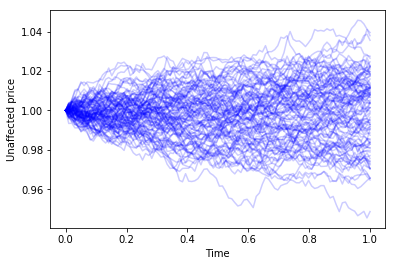

In [4]:
sample = paths[:100]

plt.plot(*sample.T, "b", alpha=0.2)
plt.ylabel("Unaffected price")
plt.xlabel("Time")
plt.show()

## Solve

We solve, and time, the optimal execution problem using the signature method. As we see, the signature method is quick to train.

In [5]:
%%time

l = optimiser.optimise(ES, **params)


CPU times: user 185 ms, sys: 206 ms, total: 391 ms
Wall time: 67.1 ms


## Evaluate

The found signature strategy is then evaluated to check its performance.

In [6]:
speeds, inventories, wealths = utils.get_analytics(utils.sig_speed(l, params["N"]),
                                                   sample, **params)

In this case, it is known that the optimal solution is TWAP (Time-Weighted Average Price). The inventory should therefore decrease linearly, starting at $q_0=1$ and finishing at $q_T=0$.

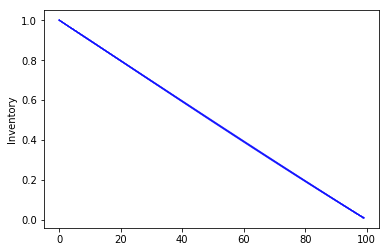

In [7]:
for Q in inventories:
    plt.plot(Q, "b", alpha=0.02)
plt.ylabel("Inventory")

plt.show()

# Changing $\phi$

Here we explore the effect of changing the "urgency term" $\phi$. As $\phi$ is increased, the inventory will decay faster as holding inventory for long periods is penalised. We will solve the optimal execution problem with signatures for different values of $\phi$.

In [8]:
phis = [0, 0.001, 0.005, 0.01]
inventories_phi = []
for phi in phis:
    params["phi"] = phi
    l = optimiser.optimise(ES, **params)
    _, inventories, _ = utils.get_analytics(utils.sig_speed(l, params["N"]),
                                                       sample, **params)
    
    inventories_phi.append(inventories)
    

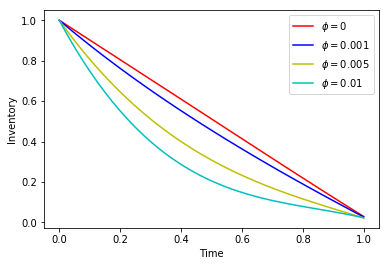

In [9]:
colours = "rbycg"

for c, inventory, phi in zip(colours, inventories_phi, phis):
    for Q in inventory[:1]:
        Q = Q[:-2]
        plt.plot(np.linspace(0, 1, len(Q)), Q, c, alpha=1., label=r"$\phi={}$".format(phi))
plt.xlabel("Time")
plt.ylabel("Inventory")
plt.legend()
plt.show()